# Homework #3: Cross-Validation and Norms

by Francisco Reveriano


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import trange, tqdm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import torch

In [43]:
# Inherit Linear Data
class linearRegression(torch.nn.Module):
    def __init__(self, n_features):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(in_features=n_features, out_features=1)

    def forward(self, x):
        return self.linear(x)

# Read Data
def read_data():
    # The first part is reading the dataset. With Pandas I can treat the dataset as if it was a .csv file.
    data = pd.read_csv("/home/franciscoAML/Documents/ECE_580/Homework03_Cross_Validation_and_Norms/imports-85.data", header=None)

    # At this point the dataset has no header. It is easier for me to place a header to make it easier to choose columns
    headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style",
               "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight",
               "engine-type",
               "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
               "peak-rpm", "city-mpg", "highway-mpg", "price"]

    # We add the headers to the table to make it readable.
    data.columns = headers

    # We can see that there are 26 columns. This means that we need to delete them. And use only the columns we have been assigned.
    # So in other words we are dropping the columns using the panda drop command function.
    data = data.drop(columns=["symboling", "normalized-losses", "make", "fuel-type", "aspiration","num-of-doors", "body-style", "drive-wheels", "engine-location","engine-type", "num-of-cylinders", "fuel-system"])

    # We now proceed to reformat the dataset by first turning all the '?' into 'NaN'
    data["price"] = pd.to_numeric(data["price"], errors='coerce')
    data["bore"] = pd.to_numeric(data["bore"], errors='coerce')
    data["stroke"] = pd.to_numeric(data["stroke"], errors='coerce')
    data["compression-ratio"] = pd.to_numeric(data["compression-ratio"], errors='coerce')
    data["horsepower"] = pd.to_numeric(data["horsepower"], errors='coerce')
    data["peak-rpm"] = pd.to_numeric(data["peak-rpm"], errors='coerce')
    # We then proceed to drop the NaN
    data = data.dropna(subset=["price"], axis=0)
    # data = data.dropna(subset=["bore"], axis= 0)
    data = data.dropna()

    # Make a copy of the model
    Model = data.copy()
    return Model


## Problem 1

Continuing with the 13 continous predictor variables from the Automobile Data Set from the UCI Machine Learning Respository that you used in Homework #2 to predict a car's price from its characteristics, you are going to further explore the 3 models you proposed in problem 2(a) in Homework #2.


### Part A

The first model I propose is a sort of null model. Basically a model running all of the 13 features. With this model I can establish a baseline to compare the performance of models with smaller features.

price = wheel-base + length + width + height + curb-weight + engine-size + bore + stroke + compression-ratio + horsepower + peak-rpm + city-mpg + highway-mpg


In [65]:
# We first set a new dataframe
Model = read_data()

# Create the X Variables in our model
#X = Model[["wheel-base", "length", "width", "height", "curb-weight","engine-size", "bore", "stroke",
 #          "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg"]]

X = Model[["wheel-base", "length", "width", "height", "curb-weight", "engine-size", "bore", "stroke",
          "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg"]]    
print("Shape of X:",X.shape)

# Create the Y Variable in our model
Y = Model["price"]

# Set Up The K-Folds
K = 10
kf = KFold(n_splits=10, shuffle=True)

MSE_List = []
for i in range(3):
    for train_index, test_index in kf.split(X):
        # Split the Dataset
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        # Set Up Linear Regression Model
        

        ## Now I can calculate the MSE using Scikit Learning
        MSE = mean_squared_error(Y_test_tensor, y_hat)
        MSE_List.append(MSE)

print(MSE_List)

Shape of X: (195, 13)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### Part B

### Part C

## Problem 2

### Part A

The first model I propose is a sort of null model. Basically a model running all of the 13 features. With this model I can establish a baseline to compare the performance of models with smaller features.

price = wheel-base + length + width + height + curb-weight + engine-size + bore + stroke + compression-ratio + horsepower + peak-rpm + city-mpg + highway-mpg

In [46]:
# We first set a new dataframe
Model = read_data()

# Create the X Variables in our model
#X = Model[["wheel-base", "length", "width", "height", "curb-weight","engine-size", "bore", "stroke",
 #          "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg"]]

X = Model[["wheel-base", "length", "width", "height", "curb-weight", "engine-size", "bore", "stroke",
          "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg"]]    
print("Shape of X:",X.shape)

# Create the Y Variable in our model
Y = Model["price"]

# Set Up The K-Folds
K = 10
kf = KFold(n_splits=10, shuffle=True)

MSE_List = []
for i in range(3):
    for train_index, test_index in kf.split(X):
        # Split the Dataset
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        # Turn values into tensors
        X_train_tensor = torch.tensor(x_train.values)
        X_test_tensor = torch.tensor(x_test.values)
        Y_train_tensor = torch.tensor(y_train.values).reshape(-1, 1)
        Y_test_tensor = torch.tensor(y_test.values).reshape(-1,1)

        # Set up the Model
        Num_Features = X.shape[1]  # takes variable 'x'
        outputDim = 1  # takes variable 'y'
        learningRate = 0.001
        epochs = 400

        model = linearRegression(Num_Features)
        criterion = torch.nn.L1Loss()
        optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

        # Run through the model
        for j in range(epochs):
            # Clear Gradients
            optimizer.zero_grad()
            # Run Model
            outputs = model.forward(X_train_tensor.float())
            # Get Lost for Predicted Output
            loss = criterion(outputs, Y_train_tensor.float())
            # Backward Propogation
            loss.backward()
            # Update Parameters
            optimizer.step()

        # Test Prediction of the Model
        optimizer.zero_grad()
        y_hat = model(X_test_tensor.float())

        # Calculate MSE
        ## Convert to Numpy
        y_hat = y_hat.detach().numpy()
        Y_test_tensor = Y_test_tensor.numpy()

        ## Now I can calculate the MSE using Scikit Learning
        MSE = mean_squared_error(Y_test_tensor, y_hat)
        MSE_List.append(MSE)

print(MSE_List)

Shape of X: (195, 13)
[62880594.81612865, 90433716.54150268, 161720031.67088223, 98030043.98799485, 74729496.67195877, 75996663.0060849, 81774732.57827486, 107704509.97239442, 50552366.72964641, 42968660.47549667, 186126201.86420456, 62106140.057438746, 79243215.15514083, 34063211.34233005, 126614112.41477732, 45783783.82462186, 118654982.46048993, 58640784.159912184, 119404819.9429537, 27103236.989394415, 131859368.76835613, 138171450.45820045, 114656266.6855547, 87951597.66016363, 34876960.72619096, 84133867.60150465, 61704370.93756913, 71740357.16944756, 59857193.746305704, 53947628.60479059]


#### Part i

Plot a kernel density estimate for the mean square error (MSE) for this model. (Each fold yields an estimate of MSE; find the kernel density estimate using the 30 samples of MSE)

Length of MSE: 30


Text(0.5, 1.0, 'KDE Plot of Model 1')

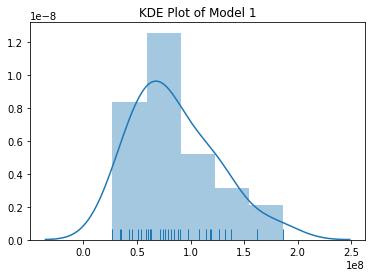

In [47]:
# Make sure MSE List is 30
print("Length of MSE:", len(MSE_List))

# Plot KDE of MSE
sns.distplot(MSE_List, kde=True, rug=True)
plt.title("KDE Plot of Model 1")

#### Part ii

What is E[MSE] for this model?

In [48]:
# Expected Value of the MSE
Expected_Value = np.average(MSE_List)
print("Expected Average:", Expected_Value)

Expected Average: 84781012.23399039


#### Part iii

Compute the variance for this model? 

In [49]:
# Calculate Expected Variance 
Variance = np.var(MSE_List)
print("Variance:", Variance)

Variance: 1466306021314122.5


#### Part iv
Find the (bias)^2 + noise variance for this model, assuming E[MSE] is a good approximation for MSE. 

In [50]:
# Calculate Using the Formula
bias_squared_noise_variance = Expected_Value - Variance
print("Bias^2 + Noise Variance:", bias_squared_noise_variance)

Bias^2 + Noise Variance: -1466305936533110.2


### Part B

The second model would be the least feature model. Meaning that for this model I would try to use the least amount of features. The features chosen are comming directly from correlation. So this model is at the very low range of the spectrum. And I am dropping features that did not show any correlation with price or anything else in the previous exercises.

price = curb-weight + horsepower + city-mpg

In [51]:
# We first set a new dataframe
Model = read_data()

# Create the X Variables in our model
X = Model[["curb-weight", "horsepower", "city-mpg"]]

# Create the Y Variable in our model
Y = Model["price"]

# Set Up The K-Folds
K = 10
kf = KFold(n_splits=10, shuffle=True)

MSE_List = []
for i in range(3):
    for train_index, test_index in kf.split(X):
        # Split the Dataset
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        # Turn values into tensors
        X_train_tensor = torch.tensor(x_train.values)
        X_test_tensor = torch.tensor(x_test.values)
        Y_train_tensor = torch.tensor(y_train.values).reshape(-1, 1)
        Y_test_tensor = torch.tensor(y_test.values).reshape(-1,1)

        # Set up the Model
        Num_Features = 3  # takes variable 'x'
        outputDim = 1  # takes variable 'y'
        learningRate = 0.001
        epochs = 400

        model = linearRegression(Num_Features)
        criterion = torch.nn.L1Loss()
        optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

        # Run through the model
        for j in range(epochs):
            # Clear Gradients
            optimizer.zero_grad()
            # Run Model
            outputs = model.forward(X_train_tensor.float())
            # Get Lost for Predicted Output
            loss = criterion(outputs, Y_train_tensor.float())
            # Backward Propogation
            loss.backward()
            # Update Parameters
            optimizer.step()

        # Test Prediction of the Model
        optimizer.zero_grad()
        y_hat = model(X_test_tensor.float())

        # Calculate MSE
        ## Convert to Numpy
        y_hat = y_hat.detach().numpy()
        Y_test_tensor = Y_test_tensor.numpy()

        ## Now I can calculate the MSE using Scikit Learning
        MSE = mean_squared_error(Y_test_tensor, y_hat)
        MSE_List.append(MSE)

print(MSE_List)

[50898085.979902506, 41502023.085931644, 43852712.48071275, 25043864.887864314, 94963270.70589454, 29172710.151345078, 75691550.592696, 36109491.530617125, 11367323.187322265, 17155957.670813963, 71166932.4860775, 49089087.68785, 40331242.46019094, 67051651.76365062, 70841963.28165475, 20693793.170721255, 36234385.1086587, 25903341.63258869, 9965658.268790985, 38027536.248786524, 64430744.87004213, 6400331.287399113, 40610952.99327089, 38464189.41428609, 45754632.01104586, 76717586.36385398, 36243086.38343565, 26299236.6311123, 48521388.7119746, 32365003.63327389]


#### Part i
Plot a kernel density estimate for the mean square error (MSE) for this model. (Each fold yields an estimate of MSE; find the kernel density estimate using the 30 samples of MSE)

Length of MSE: 30


Text(0.5, 1.0, 'KDE Plot of Model 1')

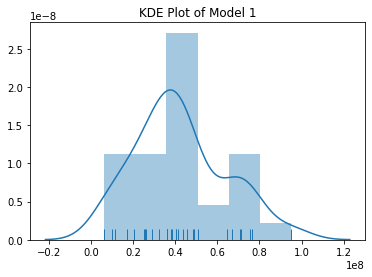

In [52]:
# Make sure MSE List is 30
print("Length of MSE:", len(MSE_List))

# Plot KDE of MSE
sns.distplot(MSE_List, kde=True, rug=True)
plt.title("KDE Plot of Model 2")

#### Part ii
What is E[MSE] for this model?

In [53]:
# Expected Value of the MSE
Expected_Value = np.average(MSE_List)
print("Expected Average:", Expected_Value)

Expected Average: 42362324.489392154


#### Part iii
Compute the variance for this model? 

In [54]:
# Calculate Expected Variance 
Variance = np.var(MSE_List)
print("Variance:", Variance)

Variance: 454409552222017.4


#### Part iv
Find the (bias)^2 + noise variance for this model, assuming E[MSE] is a good approximation for MSE. 

In [55]:
# Calculate Using the Formula
bias_squared_noise_variance = Expected_Value - Variance
print("Bias^2 + Noise Variance:", bias_squared_noise_variance)

Bias^2 + Noise Variance: -454409509859692.9


### Part C

The third model would be a more balanced model. I would try to drop some features but include a few more that were in the medium correlation levels. This should be a more balanced model that is probably closer to what Lasso or PCA would tell me to do.

price = length + curb-weight + engine-size + horsepower + city-mpg + compression-ratio

In [58]:
# We first set a new dataframe
Model = read_data()

# Create the X Variables in our model
X = Model[["length", "curb-weight", "engine-size", "horsepower", "city-mpg", "compression-ratio"]]
print("Shape of X:",X.shape)

# Create the Y Variable in our model
Y = Model["price"]

# Set Up The K-Folds
K = 10
kf = KFold(n_splits=10, shuffle=True)

MSE_List = []
for i in range(3):
    for train_index, test_index in kf.split(X):
        # Split the Dataset
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        # Turn values into tensors
        X_train_tensor = torch.tensor(x_train.values)
        X_test_tensor = torch.tensor(x_test.values)
        Y_train_tensor = torch.tensor(y_train.values).reshape(-1, 1)
        Y_test_tensor = torch.tensor(y_test.values).reshape(-1,1)

        # Set up the Model
        Num_Features = X.shape[1]  # takes variable 'x'
        outputDim = 1  # takes variable 'y'
        learningRate = 0.001
        epochs = 400

        model = linearRegression(Num_Features)
        criterion = torch.nn.L1Loss()
        optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

        # Run through the model
        for j in range(epochs):
            # Clear Gradients
            optimizer.zero_grad()
            # Run Model
            outputs = model.forward(X_train_tensor.float())
            # Get Lost for Predicted Output
            loss = criterion(outputs, Y_train_tensor.float())
            # Backward Propogation
            loss.backward()
            # Update Parameters
            optimizer.step()

        # Test Prediction of the Model
        optimizer.zero_grad()
        y_hat = model(X_test_tensor.float())

        # Calculate MSE
        ## Convert to Numpy
        y_hat = y_hat.detach().numpy()
        Y_test_tensor = Y_test_tensor.numpy()

        ## Now I can calculate the MSE using Scikit Learning
        MSE = mean_squared_error(Y_test_tensor, y_hat)
        MSE_List.append(MSE)

print(MSE_List)

Shape of X: (195, 6)
[26515033.37757287, 44403656.21517376, 32539174.158147026, 76784061.66195627, 21195074.110623192, 48550562.25457844, 90341303.47658747, 40937684.834712595, 12924583.874978216, 15301970.515246391, 3918277.6666802643, 65246543.400420345, 9240877.300740313, 34369818.07316943, 68093235.07711315, 19137352.665424157, 65771340.89894301, 14462795.409909964, 25714028.383989234, 95885661.10615243, 63658143.4228168, 16531656.538605142, 87911157.76589975, 3319945.5904814242, 61915262.87101116, 19572922.169135507, 40226374.29127679, 13438098.554337552, 72052903.30905691, 25609638.084672403]


#### Part i

Plot a kernel density estimate for the mean square error (MSE) for this model. (Each fold yields an estimate of MSE; find the kernel density estimate using the 30 samples of MSE)

Length of MSE: 30


Text(0.5, 1.0, 'KDE Plot of Model 1')

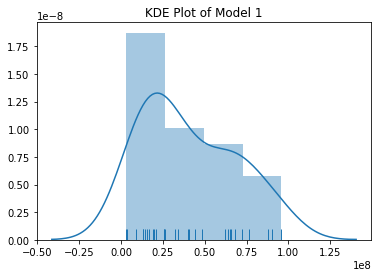

In [59]:
# Make sure MSE List is 30
print("Length of MSE:", len(MSE_List))

# Plot KDE of MSE
sns.distplot(MSE_List, kde=True, rug=True)
plt.title("KDE Plot of Model 3")

#### Part ii

What is E[MSE] for this model?

In [60]:
# Expected Value of the MSE
Expected_Value = np.average(MSE_List)
print("Expected Average:", Expected_Value)

Expected Average: 40518971.235313736


#### Part iii

Compute the variance for this model? 

In [61]:
# Calculate Expected Variance 
Variance = np.var(MSE_List)
print("Variance:", Variance)

Variance: 742699585832552.1


#### Part iv

Find the (bias)^2 + noise variance for this model, assuming E[MSE] is a good approximation for MSE. 

In [63]:
# Calculate Using the Formula
bias_squared_noise_variance = Expected_Value - Variance
print("Bias^2 + Noise Variance:", bias_squared_noise_variance)

Bias^2 + Noise Variance: -742699545313580.9
